# Analysis

# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных о растениях ириса из Scikit-learn - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

В файле этого датасета содержатся следующие колонки:
+ sepal length (cm) — длина чашелистика в сантиметрах
+ sepal width (cm) — ширина чашелистика в сантиметрах
+ petal length (cm) — длина лепестка в сантиметрах
+ petal width (cm) — ширина лепестка в сантиметрах
+ target — вид Ириса (Iris-Setosa, Iris-Versicolour, Iris-Virginica)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) Основные характеристики датасета

In [7]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
# Размер датасета - 150 строк, 5 колонок
data.shape

(150, 5)

In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [10]:
# Список колонок
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
# Список колонок с типами данных
data.dtypes

sepal length (cm) float64
sepal width (cm) float64
petal length (cm) float64
petal width (cm) float64
target float64
dtype: object

In [12]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений: 0 - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [13]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Определим уникальные значения для целевого признака
data['target'].unique()

# Целевой признак содержит только значения 0.0, 1.0 и 2.0.

array([0., 1., 2.])

## 3) Визуальное исследование датасета

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

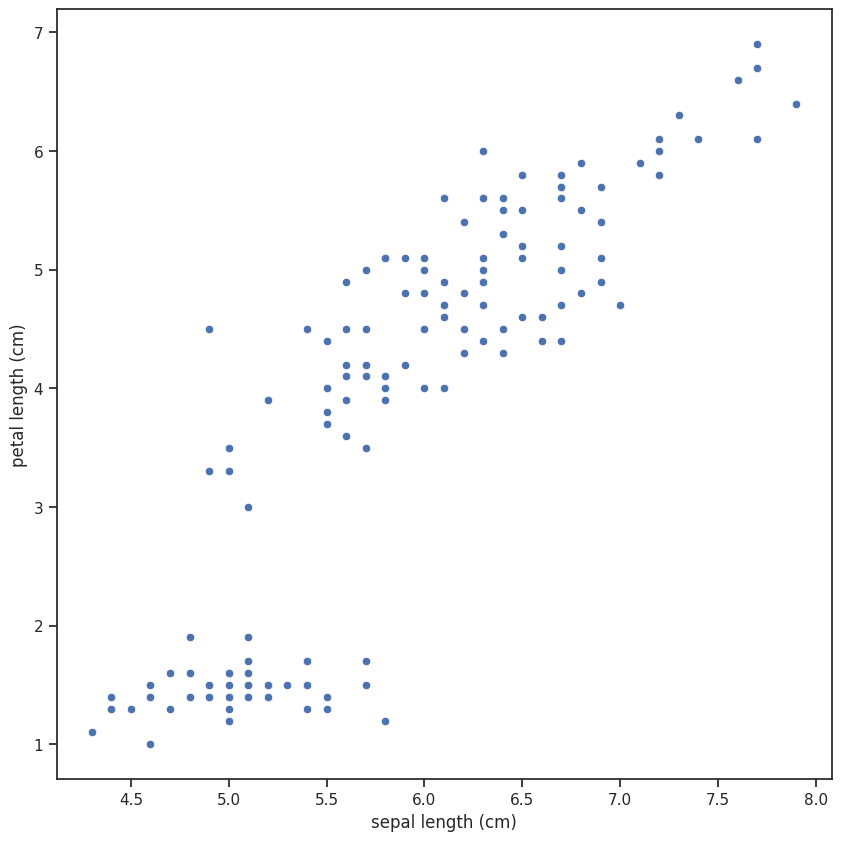

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data)

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

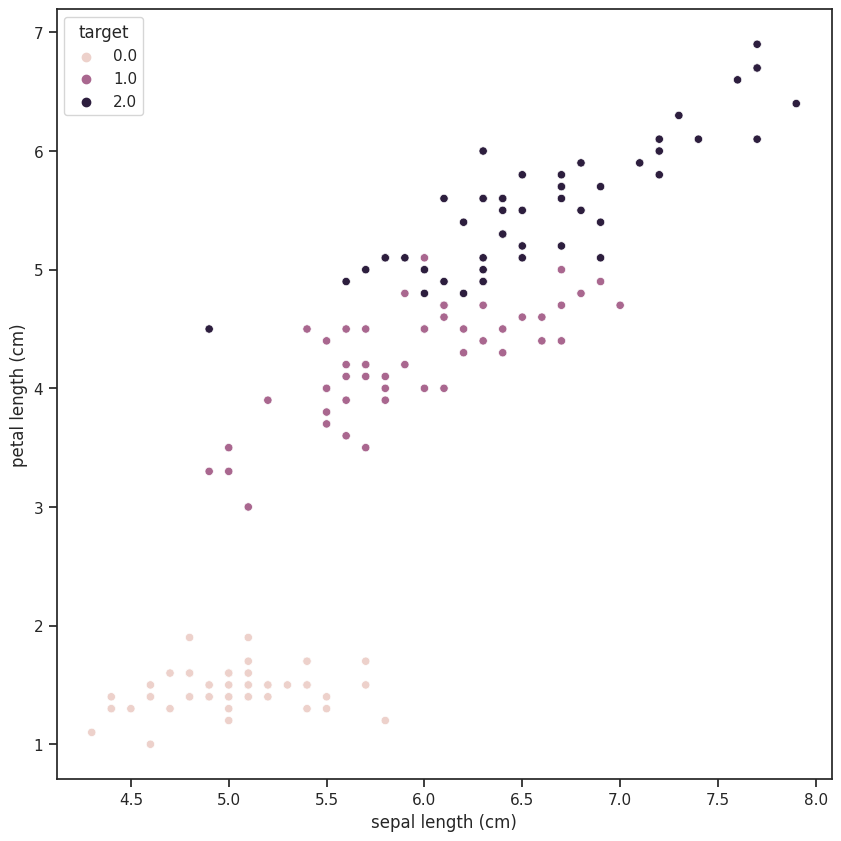

In [16]:
# Посмотрим насколько на эту зависимость влияет целевой признак.

fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data, hue='target')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<ipython-input-17-7095b63bf950>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal length (cm)'])


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

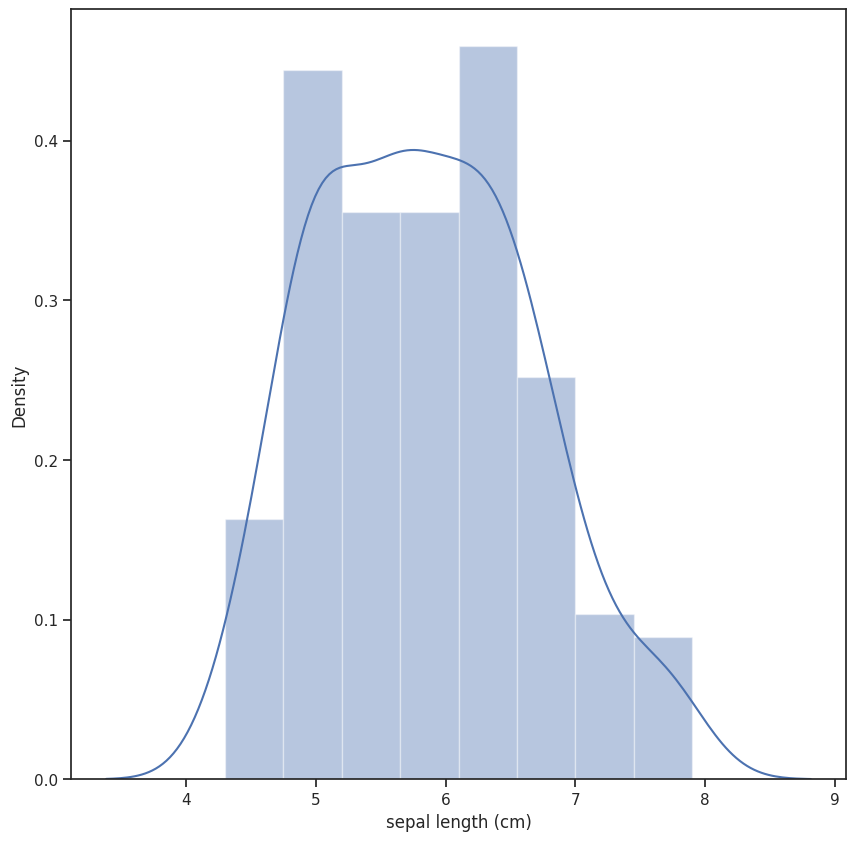

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal length (cm)'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

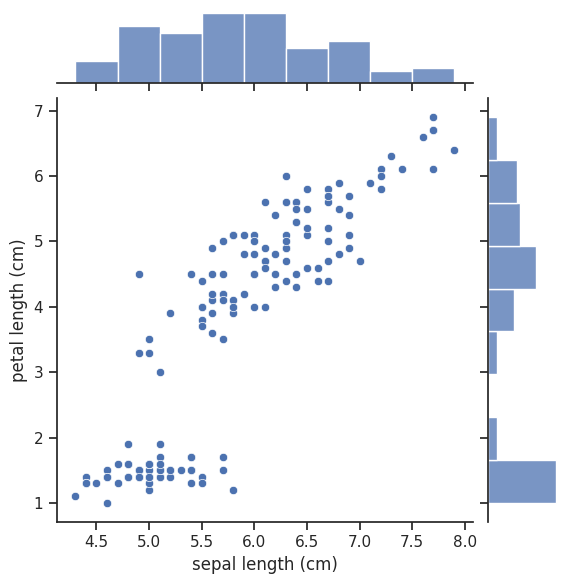

In [18]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data)

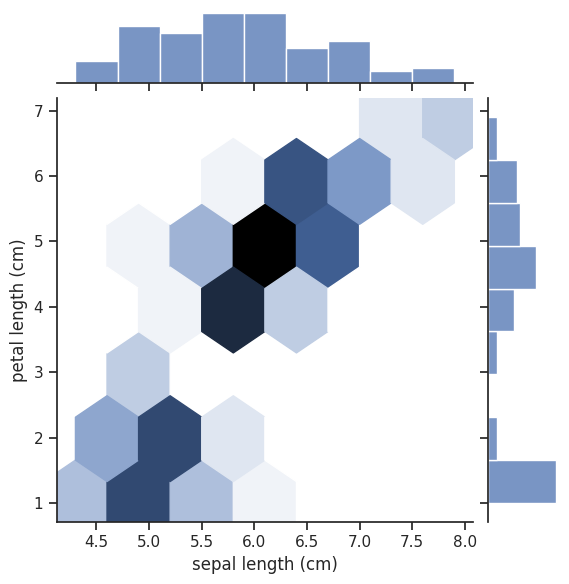

In [19]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data, kind='hex')

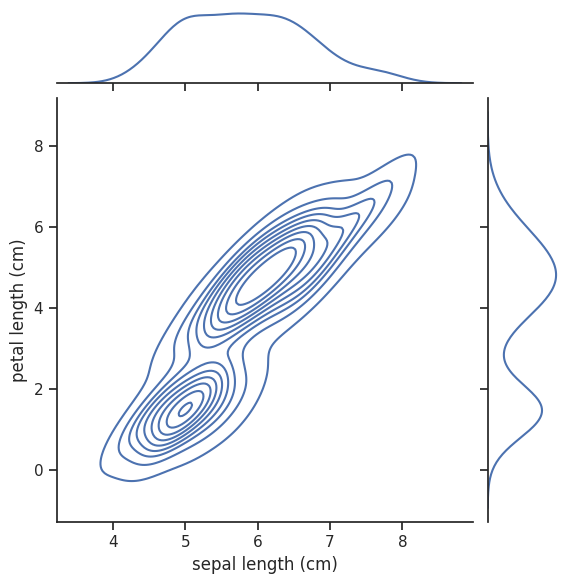

In [20]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data, kind='kde')

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

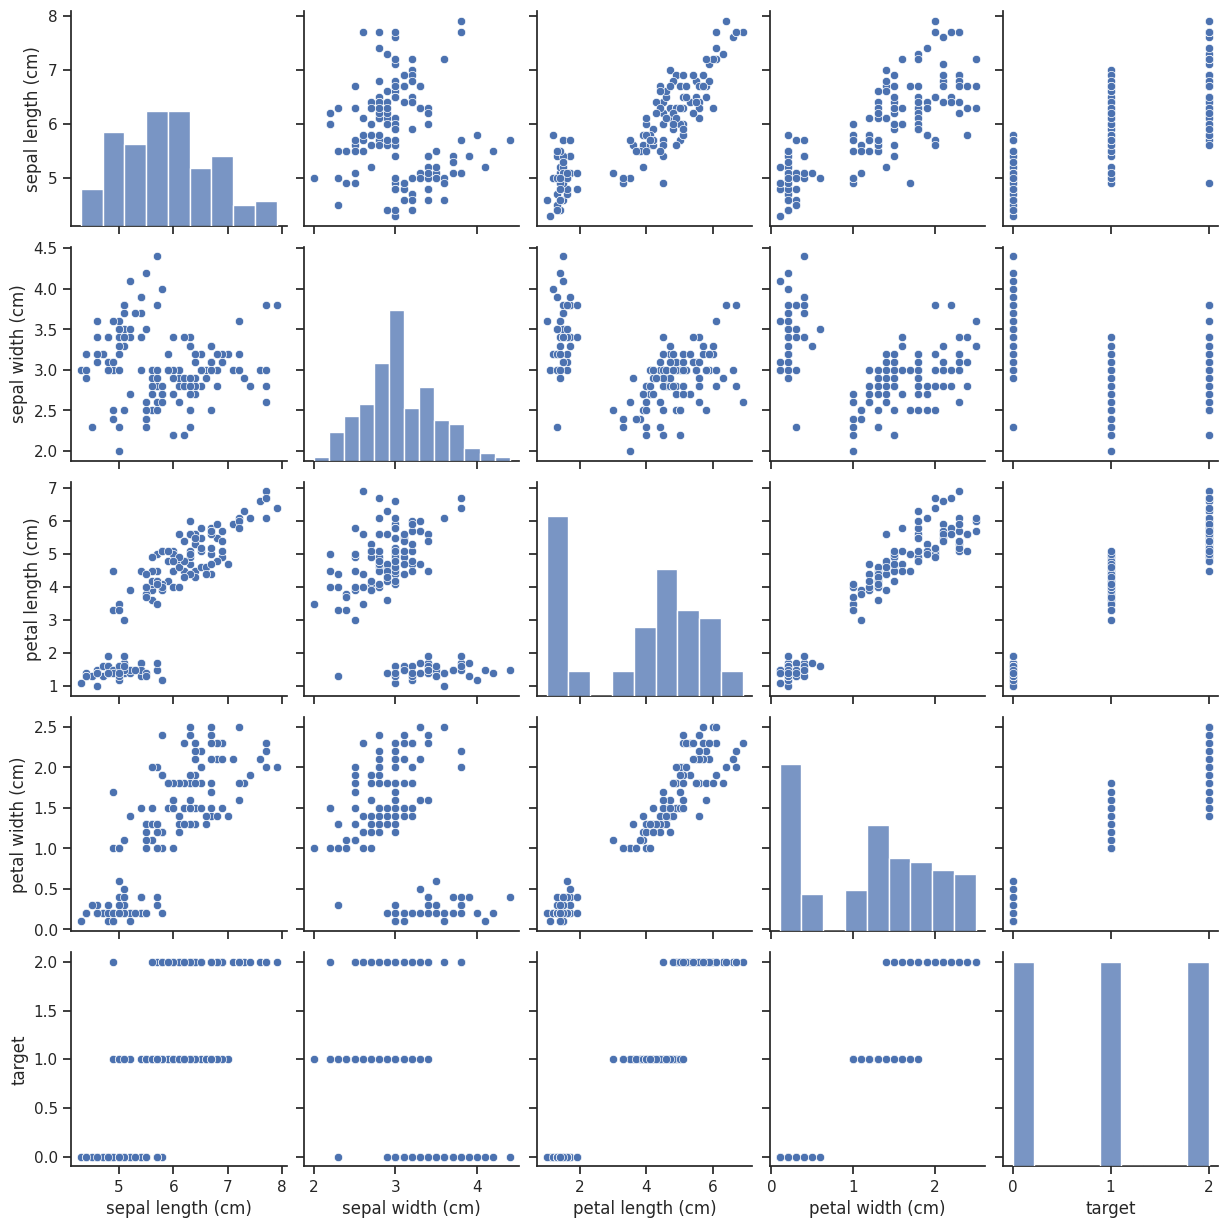

In [21]:
sns.pairplot(data)

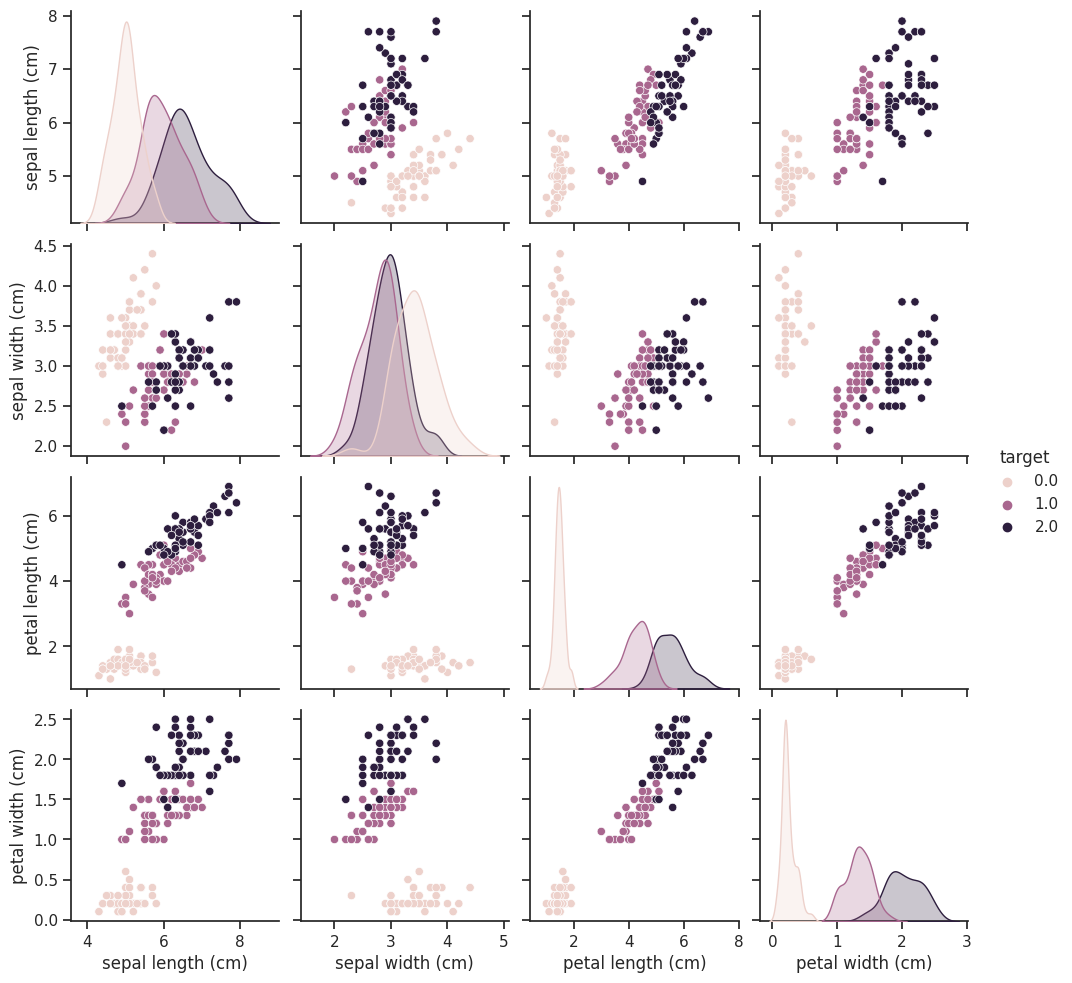

In [22]:
# С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

sns.pairplot(data, hue="target")

### Ящик с усами

Отображает одномерное распределение вероятности.

<Axes: xlabel='sepal length (cm)'>

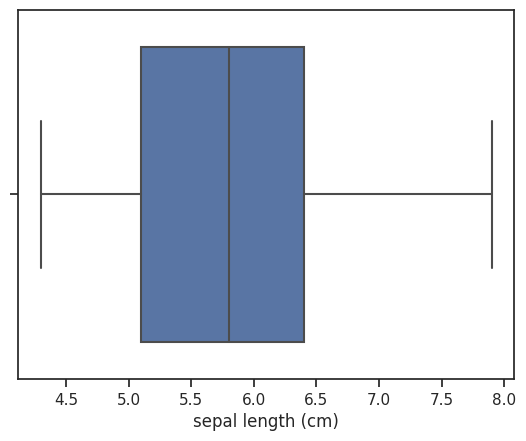

In [23]:
sns.boxplot(x=data['sepal length (cm)'])

<Axes: ylabel='sepal length (cm)'>

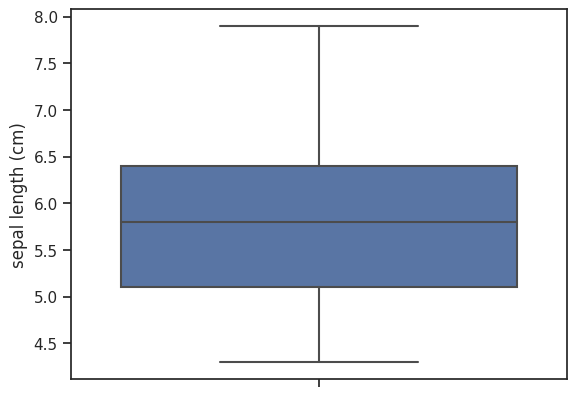

In [24]:
# По вертикали
sns.boxplot(y=data['sepal length (cm)'])

### Violin plot

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<Axes: xlabel='sepal length (cm)'>

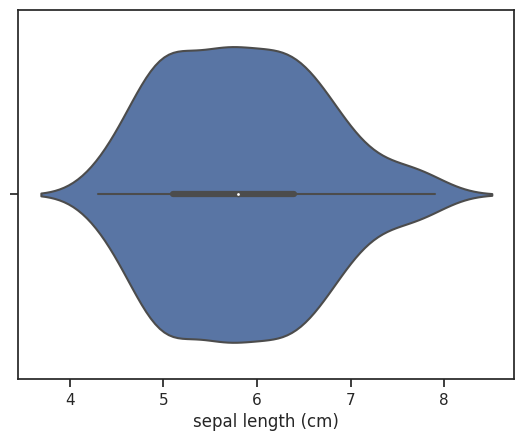

In [25]:
sns.violinplot(x=data['sepal length (cm)'])

<ipython-input-26-a842ab9a0e9d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal length (cm)'], ax=ax[1])


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

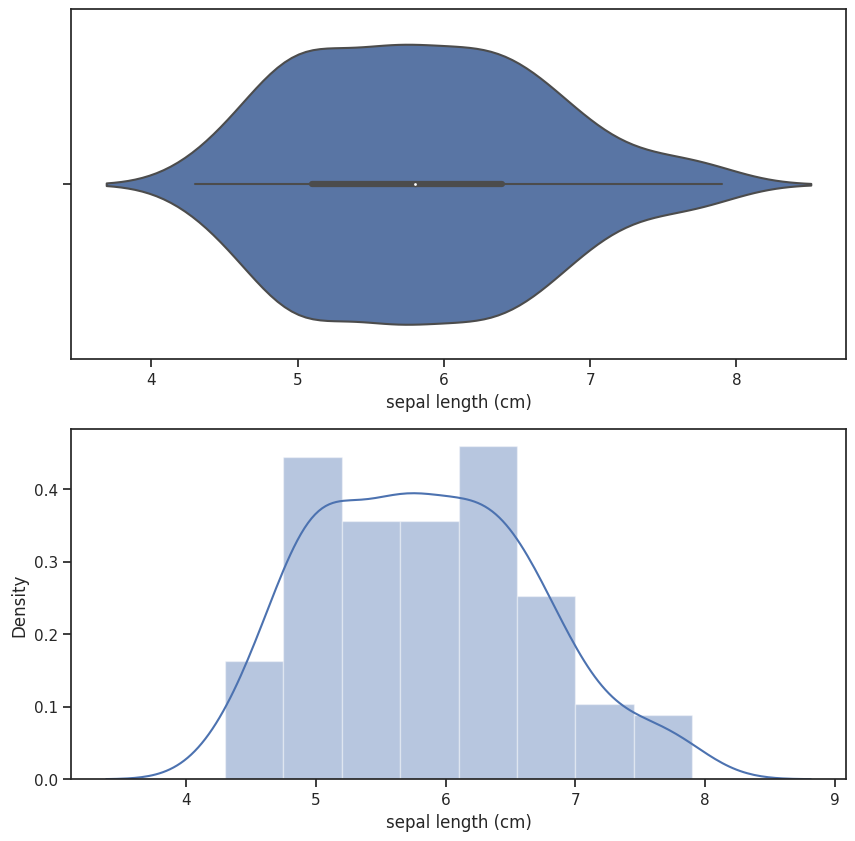

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['sepal length (cm)'])
sns.distplot(data['sepal length (cm)'], ax=ax[1])

## 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "target"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [27]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

Целевой признак наиболее сильно коррелирует с длиной лепестка (0.95) и шириной лепестка (0.96). Эти признаки обязательно следует оставить в модели.
Целевой признак отчасти коррелирует с длиной чашелистика (0.78) и шириной чашелистика (0.43). Эти признаки стоит также оставить в модели.
Длина лепестка и ширина лепестка очень сильно коррелируют между собой (0.96). Это неудивительно, ведь это размерности одного лепестка. Поэтому из этих признаков в модели можно оставлять только один.
Также можно сделать вывод, что выбирая из признаков длины лепестка и ширины лепестка лучше выбрать ширину лепестка, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.

In [28]:
# По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. 
# Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. 
# На практике три метода редко дают значимые различия.

data.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [29]:
data.corr(method='kendall')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.076997,0.718516,0.655309,0.670444
sepal width (cm),-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal length (cm),0.718516,-0.185994,1.000000,0.806891,0.822911
petal width (cm),0.655309,-0.157126,0.806891,1.000000,0.839687
target,0.670444,-0.337614,0.822911,0.839687,1.000000


In [30]:
data.corr(method='spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.166778,0.881898,0.834289,0.798078
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal length (cm),0.881898,-0.309635,1.000000,0.937667,0.935431
petal width (cm),0.834289,-0.289032,0.937667,1.000000,0.938179
target,0.798078,-0.440290,0.935431,0.938179,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

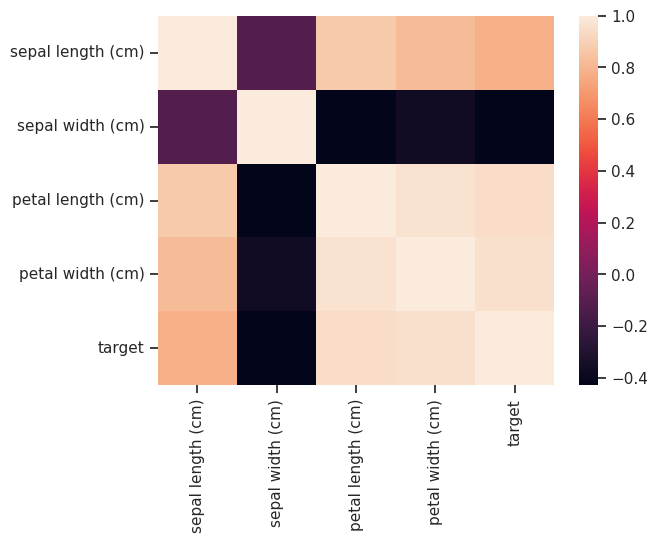

In [31]:
sns.heatmap(data.corr())

<Axes: >

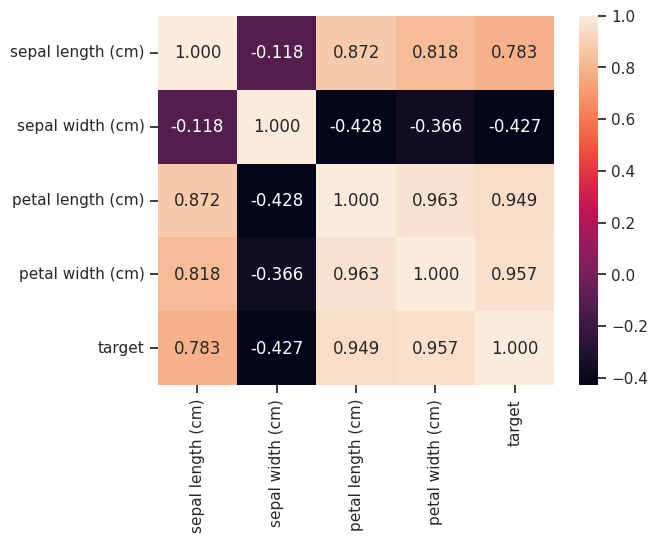

In [32]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<Axes: >

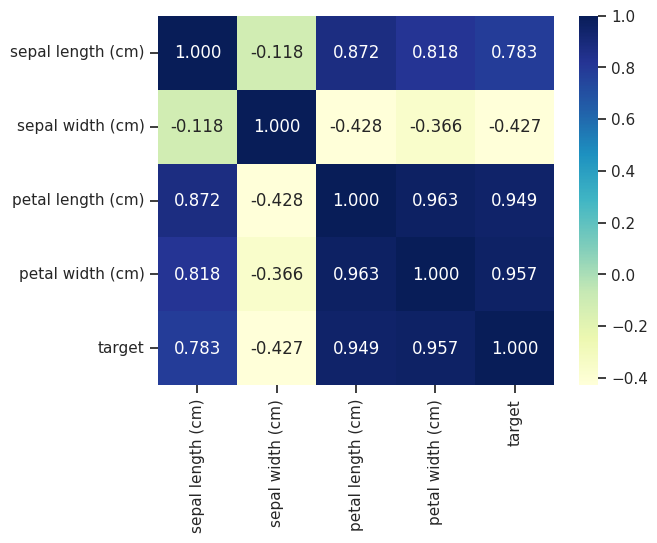

In [33]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

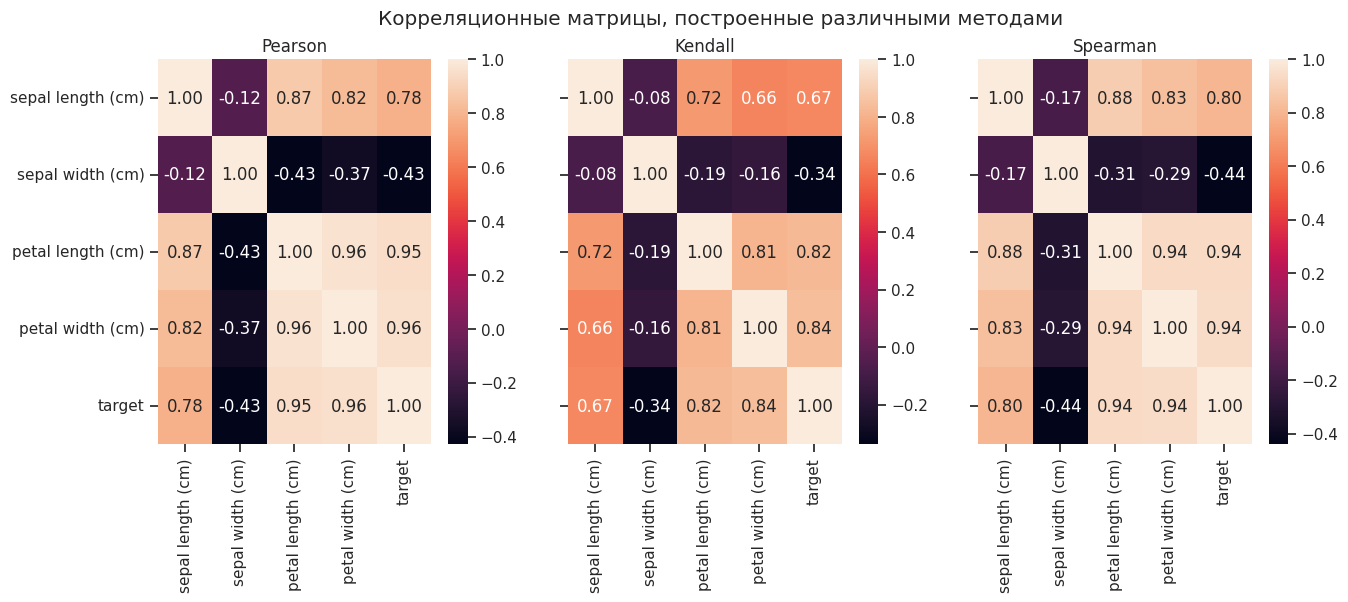

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.  

Параметр figsize=(размер по горизонтали, размер по вертикали).  

По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения — https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html.  

Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.  

<Axes: >

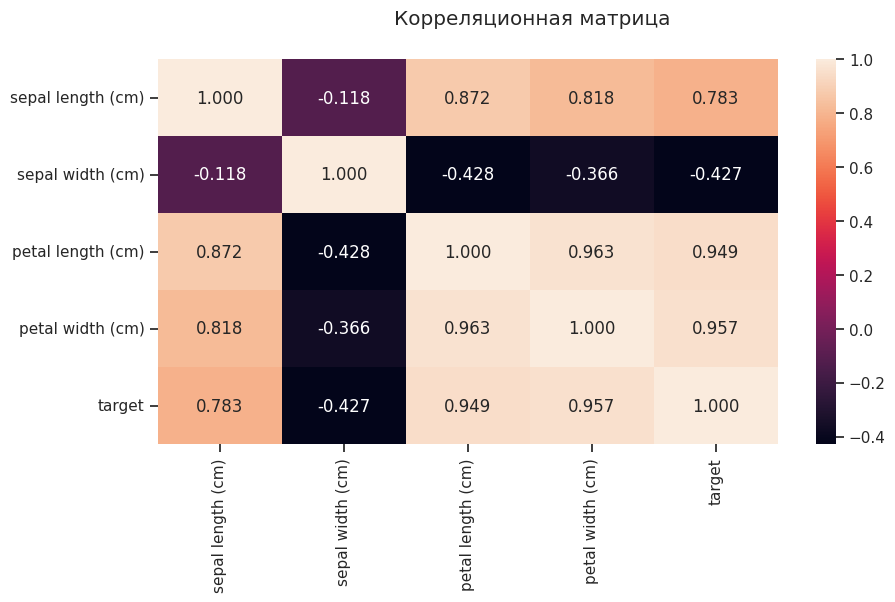

In [35]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками petal width и petal length, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состоящие более чем из двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации — "Солнечная корреляционная карта" Solar correlation map.

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:

https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
https://www.mtab.com/the-puzzle-of-visualizing-correlations/